In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('UpdatedResumeDataSet[1].csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

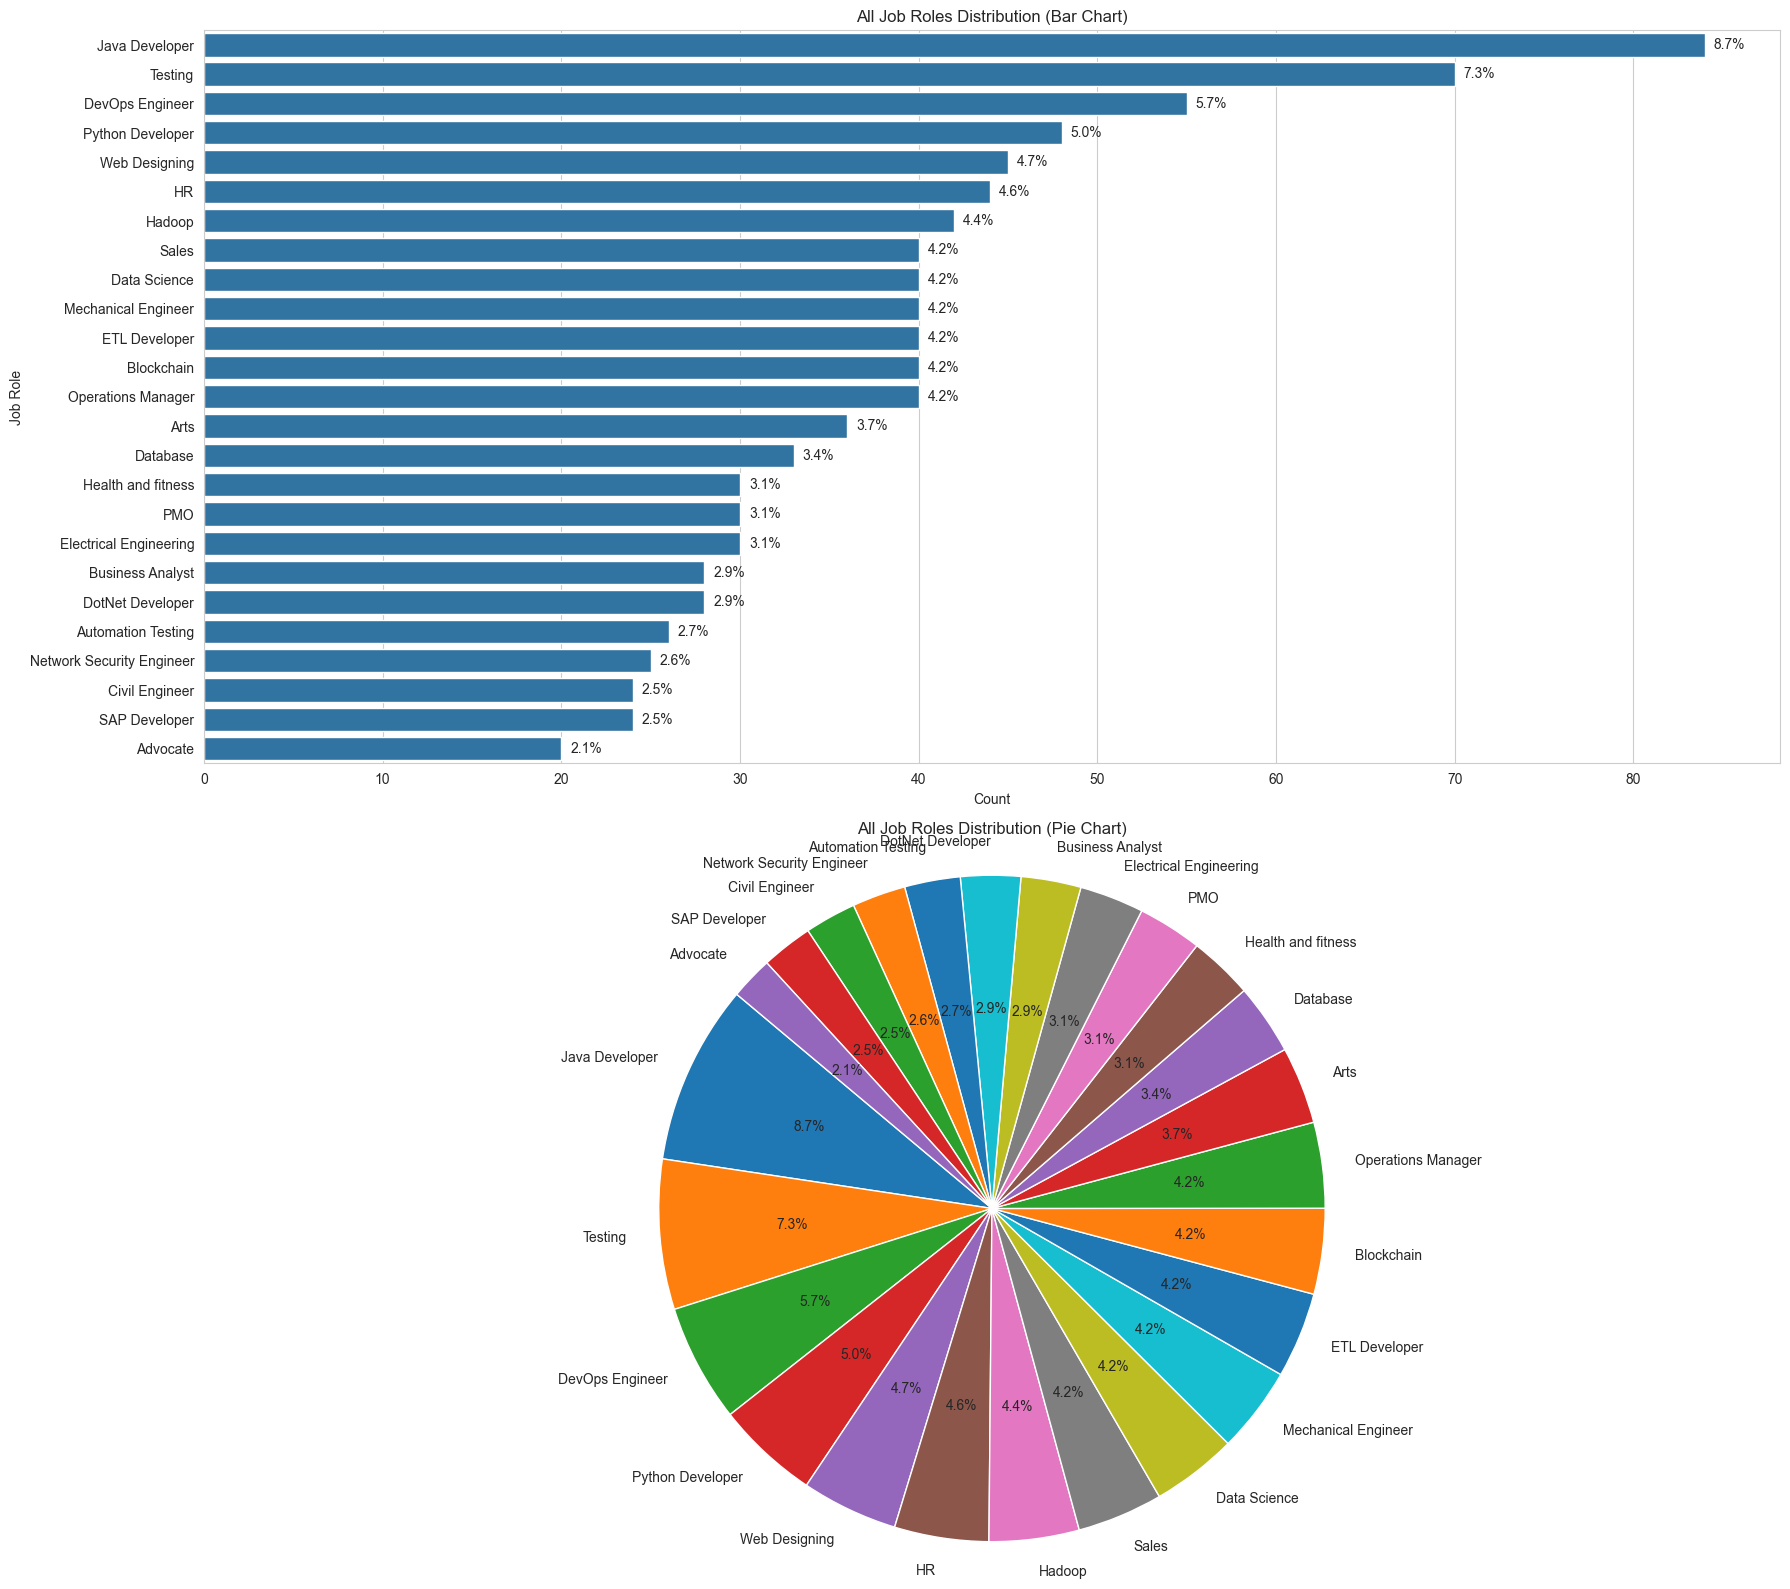

In [6]:
sns.set_style("whitegrid")
total = len(df)
role_counts = df['Category'].value_counts()
plt.figure(figsize=(18,16))
plt.subplot(2, 1, 1)
ax = sns.countplot(
    y='Category',
    data=df,
    order=role_counts.index)
for p in ax.patches:
    percent = f'{(p.get_width() / total) * 100:.1f}%'
    ax.text(
        p.get_width() + 0.5,
        p.get_y() + p.get_height() / 2,
        percent,
        va='center')
plt.title("All Job Roles Distribution (Bar Chart)")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.subplot(2, 1, 2)
plt.pie(
    role_counts.values,
    labels=role_counts.index,
    autopct='%1.1f%%',
    startangle=140)
plt.title("All Job Roles Distribution (Pie Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()

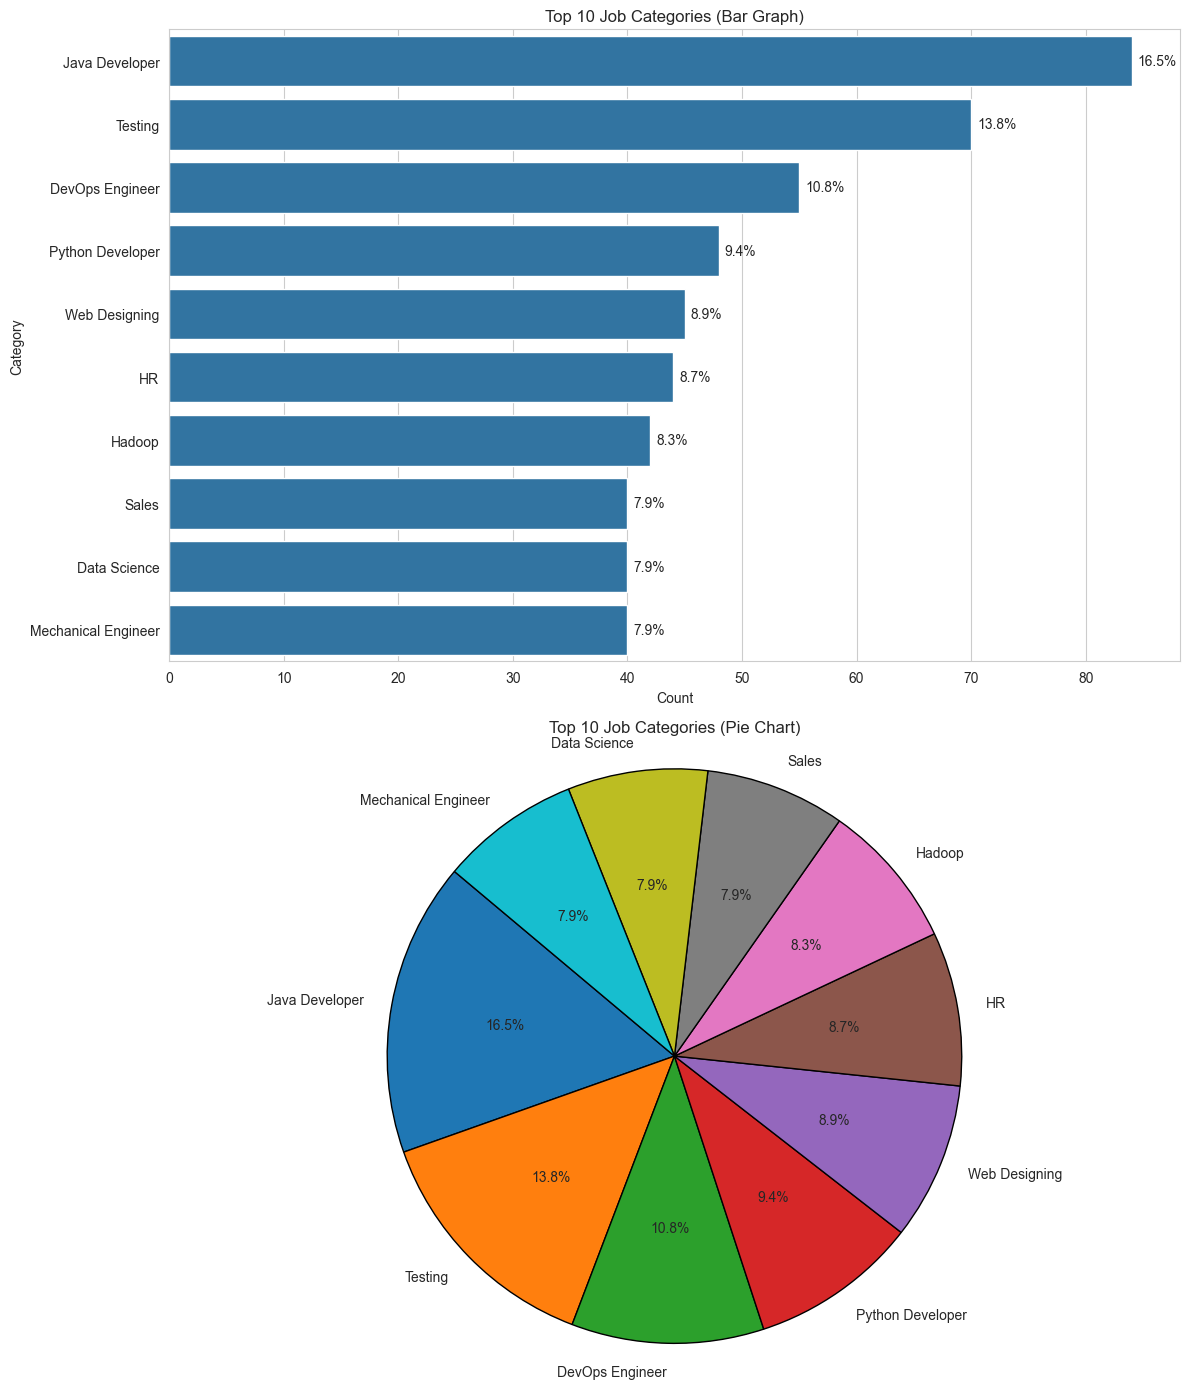

In [7]:
sns.set_style("whitegrid")
top10 = df['Category'].value_counts().head(10)
total_top10 = top10.sum()
plt.figure(figsize=(12,14))
plt.subplot(2, 1, 1)
ax = sns.barplot(
    x=top10.values,
    y=top10.index)
for i, v in enumerate(top10.values):
    percent = f'{(v / total_top10) * 100:.1f}%'
    ax.text(v + 0.5, i, percent, va='center')
plt.title("Top 10 Job Categories (Bar Graph)")
plt.xlabel("Count")
plt.ylabel("Category")
plt.subplot(2, 1, 2)
plt.pie(
    top10.values,
    labels=top10.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'})
plt.title("Top 10 Job Categories (Pie Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [8]:
df['Category'][0]


'Data Science'

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
import re
def cleanResume(text):
    if not isinstance(text, str):
        return ""     
    text = re.sub(r'http\S+', ' ', text)          # remove URLs
    text = re.sub(r'RT|cc', ' ', text)             # remove RT, cc
    text = re.sub(r'#\S+', ' ', text)              # remove hashtags
    text = re.sub(r'@\S+', ' ', text)              # remove mentions
    text = re.sub(r'[^\x00-\x7f]', ' ', text)      # remove non-ASCII
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~]', ' ', text)
    text = re.sub(r'\s+', ' ', text)               # remove extra spaces
    return text.lower()


In [11]:
df['Resume'] = df['Resume'].apply(cleanResume)

In [12]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the 

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [14]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredText  = tfidf.transform(df['Resume'])

In [16]:
requredText

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164261 stored elements and shape (962, 7351)>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(requredText, df['Category'], test_size=0.2, random_state=42)
X_train.shape

(769, 7351)

In [19]:
X_test.shape

(193, 7351)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9845
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  

In [21]:
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0 

In [22]:
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9845
Confusion Matrix:
[[ 1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0

In [23]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [24]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [25]:
myresume = """
SYED IMTHIYAZ
+91 9550730829
Gurramkonda, Madanapalle, Andhra Pradesh
syedimthiyaz456@gmail.com
linkedin.com/in/syed-imthiyaz
github.com/imthiyaz-official

PROFESSIONAL SUMMARY
Computer Science undergraduate with strong skills in Python, SQL, and data analysis.
Experienced in exploratory data analysis (EDA), data cleaning, and feature engineering,
with hands-on experience using Pandas, NumPy, Matplotlib, and Seaborn.
Proficient in building interactive dashboards using Power BI and Tableau, and familiar with
AWS cloud services (EC2, S3, IAM).
Seeking entry-level Data Analyst or Data Science roles to apply analytical,
statistical, and problem-solving skills to real-world business problems.

SKILLS
Programming: Python, Java (Basics)
Data Analysis: EDA, Data Wrangling, Data Cleaning, Feature Engineering
Statistics: Descriptive Statistics, Probability, Hypothesis Testing
Machine Learning: Regression, Classification, Model Evaluation
Databases: SQL (Joins, Subqueries, Aggregations), PostgreSQL
Visualization: Power BI, Tableau, Seaborn
Libraries: Pandas, NumPy, Scikit-learn
Tools: Git, GitHub, Jupyter Notebook, Google Colab, VS Code, PyCharm
Cloud: AWS (EC2, S3, IAM)
Core CS: Data Structures, Operating Systems, Computer Networks, OOP
Interpersonal Skills: Communication, Team Collaboration, Active Listening
Professional Skills: Problem Solving, Analytical Thinking, Adaptability, Time Management

PROJECTS
Real-Time Hand Tracking System
Python, OpenCV, Tkinter
Developed a Python-based real-time computer vision system using OpenCV with multithreaded
camera capture.
Optimized frame processing to improve stability and reduce latency by 25 percent.

IPL Cricket Analysis Dashboard
Power BI, DAX, Data Modeling
Analyzed 60000 plus IPL match records from 2008 to 2025 and built an interactive dashboard.
Designed KPIs, slicers, and advanced DAX measures to identify team and player performance trends.

Food Habits Awareness Community Service Project
Conducted a structured survey of 100 plus participants to analyze dietary habits and nutritional gaps.
Presented data-driven insights through awareness sessions to promote healthy food practices.

INTERNSHIP
Cloud Technology Intern AWS
Saraj Innotech Services Pvt Ltd
May 2025 to July 2025
Configured and managed AWS EC2, S3, and IAM services, reducing setup time by 20 percent.
Automated S3 backup and file management processes, cutting manual effort by 40 percent.
Optimized cloud resource usage using monitoring and networking tools.
Documented cloud configurations to support team collaboration and maintenance.

CERTIFICATIONS
Python Complete Course Udemy
Data Analysis and Decision Making NPTEL
NumPy for Data Science Udemy
Power BI Certification Infosys Springboard
Master Data Science and Machine Learning Masterclass GUVI and HCL
Machine Learning and Artificial Intelligence Beginners Course Udemy
Cloud Technology AWS Certification Saraj Innotech Services Pvt Ltd APSCHE and AICTE
"""  

In [26]:
print(pred(myresume))

Data Science
